In [1]:
from pandas import read_csv, to_datetime
import matplotlib.pyplot as plt

#### 1. Read the CSV file into a pandas dataframe. (1 pt)

In [2]:
bicycleDf = read_csv('data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [3]:
bicycleDf.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


In [4]:
bicycleDf.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,56895.000000,56895.000000
mean,51.972353,58.154478
std,67.479946,84.679053
min,0.000000,0.000000
25%,6.000000,7.000000
50%,28.000000,29.000000
75%,69.000000,70.000000
max,698.000000,717.000000


#### 2. Add columns to the dataframe containing: ( 3 pt)
        i. The total (East + West) bicycle count
        ii. The hour of the day
        iii. The year

In [5]:
bicycleDf['Total Bicycle Count'] = bicycleDf['Fremont Bridge East Sidewalk'] + bicycleDf['Fremont Bridge West Sidewalk']

In [6]:
bicycleDf.dtypes

Date                             object
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
Total Bicycle Count             float64
dtype: object

In [7]:
# since Date field if of type object, we can extract data through string conversion first, then extracting attributes
bicycleDf['Hour of Day'] = to_datetime(bicycleDf['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.hour
bicycleDf['Year'] = to_datetime(bicycleDf['Date'], format='%m/%d/%Y %I:%M:%S %p').dt.year
bicycleDf.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour of Day,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


#### 3. Create a dataframe with the subset of data from the year 2016 (1 pt)

In [8]:
bicycleDf2016 = bicycleDf.loc[bicycleDf.Year == 2016,:]
bicycleDf2016.reset_index(inplace= True, drop  = True)
bicycleDf2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total Bicycle Count,Hour of Day,Year
0,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
1,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
2,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
3,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
4,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


#### 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

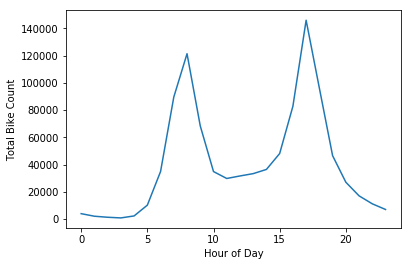

In [9]:
HourData = bicycleDf2016[['Hour of Day', 'Total Bicycle Count']].groupby(['Hour of Day']).sum()



plt.plot(HourData.index, HourData['Total Bicycle Count'])
plt.xlabel("Hour of Day")
plt.ylabel("Total Bike Count");

#### 5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

In [10]:
AverageData = bicycleDf2016.groupby('Hour of Day')['Total Bicycle Count'].agg(['sum','count'])

In [11]:
AverageData['Average'] = AverageData['sum']/AverageData['count']

In [12]:
AverageData[['Average']].idxmax(axis = 0)

Average    17
dtype: int64

As can be seen, the 17th hour of the day is the busiest [17:00-17:59] on average